In [ ]:
import cv2 # 導入OpenCV函式庫
'''
from google.colab.patches import cv2_imshow # 導入Colab.patches函式庫
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/edge_AI
'''

Mounted at /content/drive
/content/drive/MyDrive/edge_AI


In [ ]:
'''
# 下載darknet
!git clone https://github.com/AlexeyAB/darknet
# 下載yolov4-tiny預訓練權重檔(23.1MB)，僅供測試darknet用，後續用不到
!wget -N https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.weights
# 修改Makefile參數
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
# 編譯darknet
!make
'''
'''
%cd darknet
!chmod +x ./darknet
# 測試darknet編譯結果
!./darknet detector test cfg/coco.data cfg/yolov4-tiny.cfg ../yolov4-tiny.weights data/dog.jpg
'''

imgResult = cv2.imread('predictions.jpg') # 讀入結果影像
cv2_imshow(imgResult) # 顯示結果影像

In [ ]:
./darknet detector demo cfg/coco.data cfg/yolov4-tiny.cfg weights/yolov4-tiny.weights  data/1.mp4 -out_filename res.mp4 -dont_show!

In [ ]:
# export LD_LIBRARY_PATH=/usr/local/cuda/lib64
# ./darknet detector demo data/my_obj.data cfg/my_yolov4-tiny-custom.cfg my_backup/yolov4-tiny/my_yolov4-tiny-custom_final.weights video/person_2.mp4 -out_filename res.mp4
# ./darknet detector test data/my_obj.data cfg/my_yolov4-tiny-custom.cfg my_backup/yolov4-tiny/my_yolov4-tiny-custom_final.weights data/dataset/19.png
# ./darknet detector train data/my_obj.data cfg/my_yolov4-tiny-custom.cfg yolov4-tiny.conv.29

In [ ]:
./darknet detector demo data/my_obj.data cfg/my_yolov4-tiny-custom.cfg weights/my_yolov4-tiny-custom_best.weights video/test/person_3.mp4


In [ ]:
%cd /content/drive/MyDrive/edge_AI
# 相關參數到對應路徑下
!cp my_yolov4-tiny-custom.cfg darknet/cfg
!cp my_obj.names darknet/data
!cp my_obj.data darknet/data
!cp my_train.txt darknet/data
!cp my_val.txt darknet/data
!cp -R my_dataset darknet/data

/content/drive/MyDrive/edge_AI


In [ ]:
%cd darknet
!chmod +x ./darknet

In [ ]:
!./darknet detector train data/my_obj.data cfg/my_yolov4-tiny-custom.cfg yolov4-tiny.conv.29 -map -dont_show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
^C


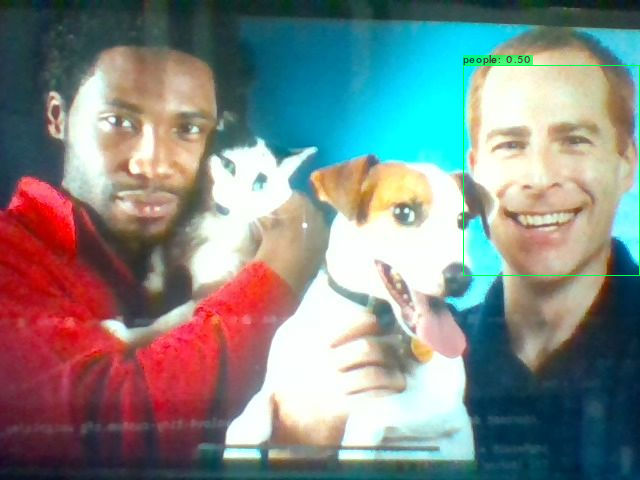

In [ ]:
!cp my_drive/yolov4-tiny/my_yolov4-tiny-custom_best.weights weights/
!./darknet detector test data/my_obj.data cfg/my_yolov4-tiny-custom.cfg weights/my_yolov4-tiny-custom_best.weights data/test01.jpg

./darknet detector test data/my_obj.data cfg/my_yolov4-tiny-custom.cfg my_backup/yolov4-tiny/my_yolov4-tiny-custom_last.weights data/dataset/19.jpg

imgResult = cv2.imread('predictions.jpg') # 讀入結果影像
cv2_imshow(imgResult) # 顯示結果影像

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


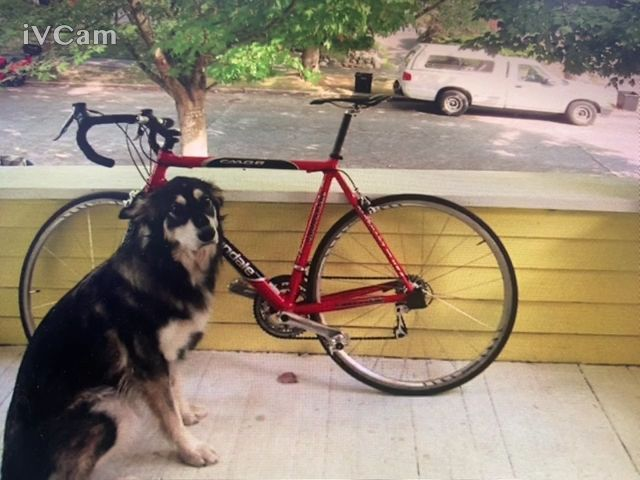

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	    

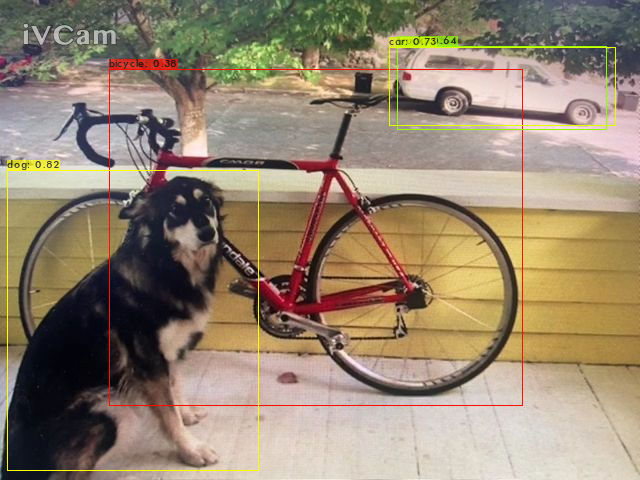

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# !./darknet detector test data/my_obj.data cfg/my_yolov4-tiny-custom.cfg weights/my_yolov4-tiny-custom_best.weights photo.jpg
!./darknet detector test cfg/coco.data cfg/yolov4-tiny.cfg ../yolov4-tiny.weights photo.jpg

imgResult = cv2.imread('predictions.jpg') # 讀入結果影像
cv2_imshow(imgResult) # 顯示結果影像

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	    

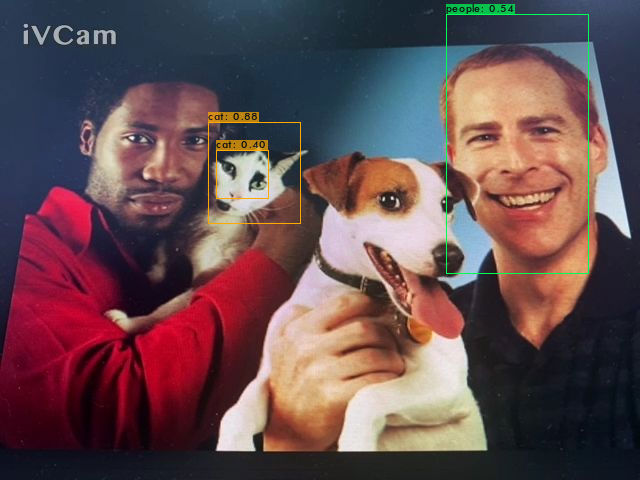